In [2]:
# 필요 패키지
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
# 파일 불러오기
data1 <- read.csv('dacon_data/블록별 성별연령대별 카드소비패턴.csv', fileEncoding="euc-kr")
data2 <- read.csv('dacon_data/블록별 시간대별소액결제건수 카드소비패턴.csv', fileEncoding='euc-kr')
data3 <- read.csv('dacon_data/집계구별 일별소비지역별 카드소비패턴.csv', fileEncoding='euc-kr')
data4 <- read.csv('dacon_data/집계구별 일별시간대별 카드소비패턴.csv', fileEncoding='euc-kr')
data5 <- read.csv('dacon_data/카드소비 업종코드.csv', fileEncoding='euc-kr')

***
# data1_블록별 성별연령대별 카드소비패턴
***
- 성별 비교
- 연령대별 이용자수 비교
- 성별 연령별 이용금액
    - 성별 연령별 총 카드 이용금액
    - 성별 연령별 평균 카드 이용금액
- 많이 이용하는 업종 상위 5위
    - 가장 많은 요식/유흥 중 소분류 관한 그래프
- 카드 이용 금액과 건수
    - 카드 이용금액이 가장 많은 이용자 상위 5위
    - 카드 이용건수가 가장 많은 이용자 상위 5위
- 연령별, 성별 업종 비교
    - 성별 업종
- 계절별 많이 이용하는 요식 업종
- 계절별 이용 업종


In [5]:
# 컬럼명 변경
names(data1) <- c('업종코드', '기준년월', '고객주소블록코드', '성별', '연령대별',
                  '카드이용금액계', '카드이용건수계')


 F  M 
48 52 

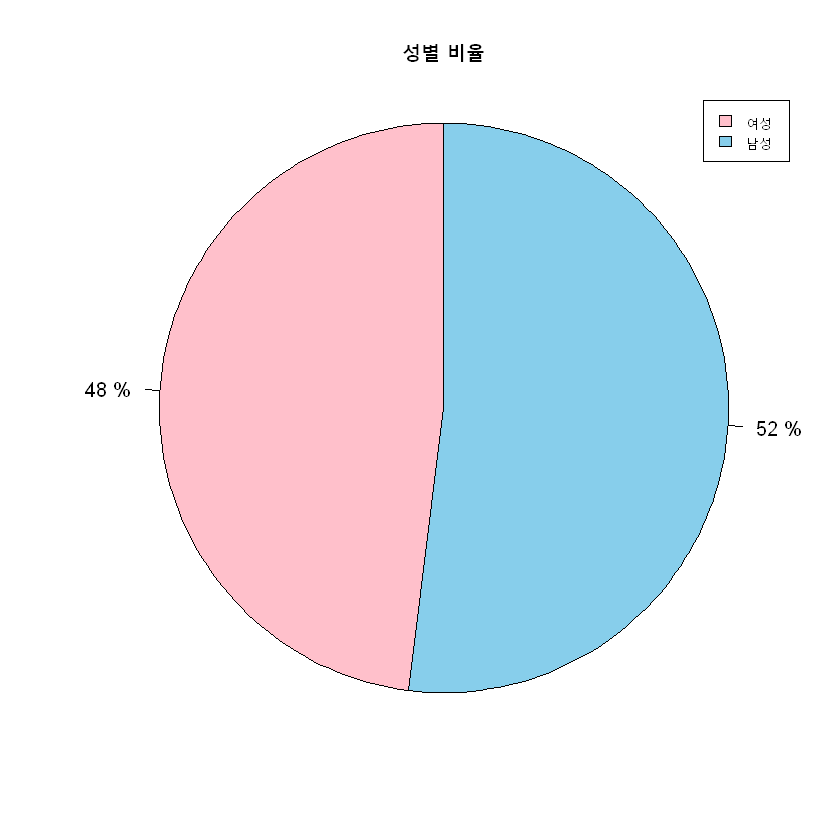

In [6]:
### 성별 파이 그래프

# 비율
gender <- round(table(data1$성별)/sum(table(data1$성별)) *100, 1)
gender
#  F  M 
# 48 52 

pie(table(data1$성별),
    radius=1,
    init.angle=90,
    label=paste(gender,'%'),
    col=c('pink','skyblue'))

title(main='성별 비율',
      font.main=2)

legend('topright',
       c('여성', '남성'),
       cex=0.8,
       fill=c('pink', 'skyblue'))

 => 여성 48%, 남성 52%로 남성이 조금 더 많다

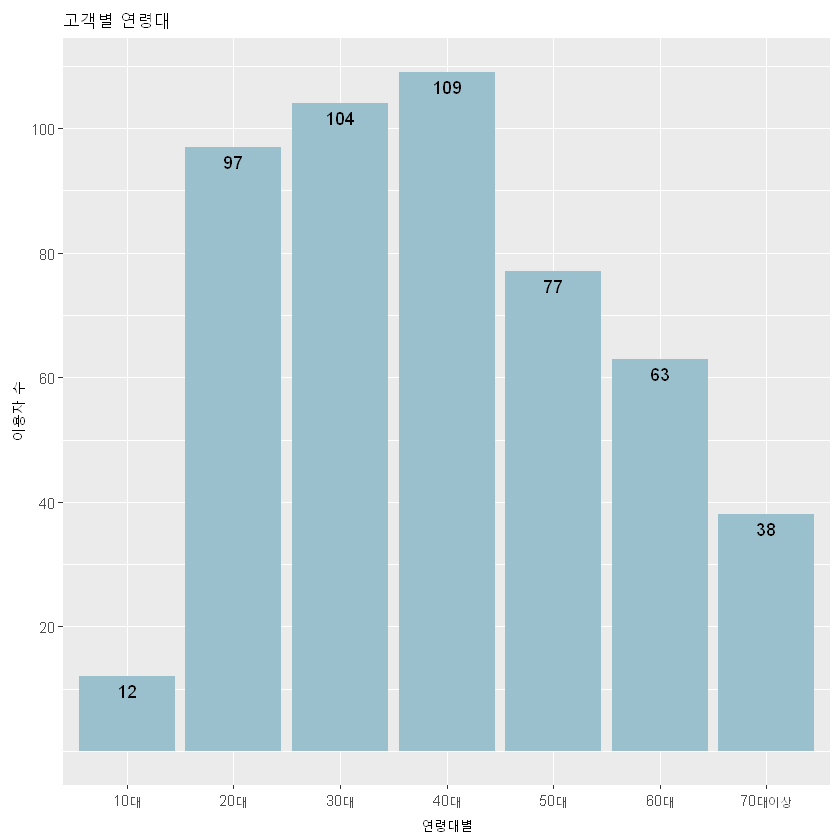

In [7]:
### 연령대별 이용자 수
ggplot(data1,aes(연령대별)) +
  geom_bar(fill='lightblue3') +
  labs(title='고객별 연령대',
       y='이용자 수') +
  geom_text(stat='count',
            aes(label=..count..),
            vjust=1.5) +
  scale_y_continuous(breaks = c(20,40,60,80,100,120))

=> 40대가 가장 많다.

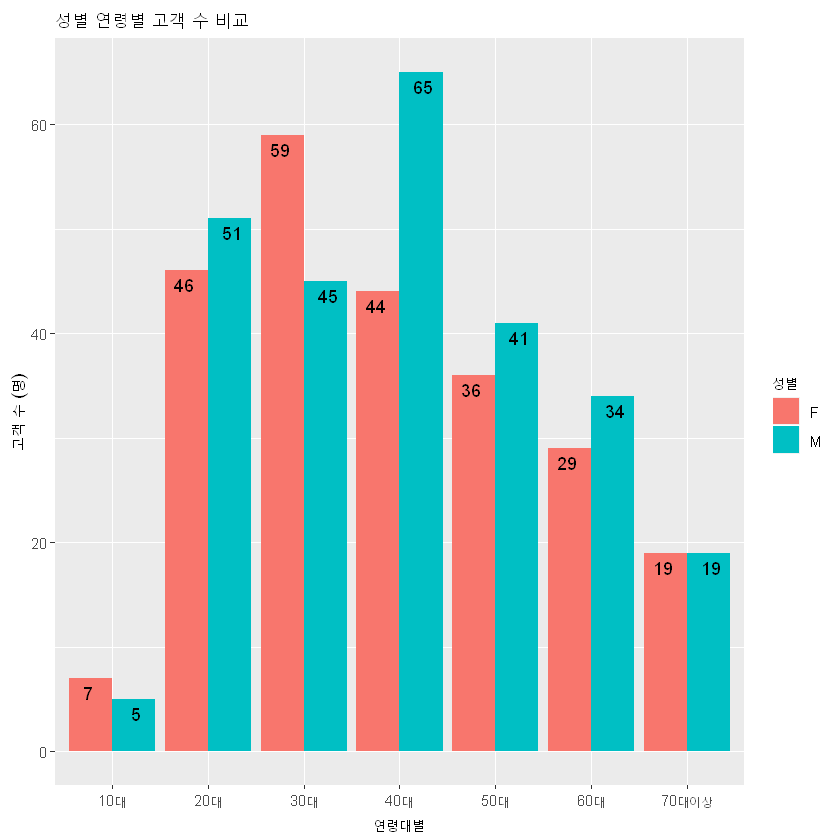

In [8]:
### 성별 연령별 막대 그래프

ggplot(data1, aes(연령대별, fill=성별)) +
  geom_bar(position='dodge') +
  labs(title='성별 연령별 고객 수 비교',
       y='고객 수 (명)') +
  geom_text(stat='count',
            aes(label=..count..),
            position=position_dodge(width = 1),
            vjust=1.5)

=> 40대 남성 > 30대 여성 > 20대 남성 순으로 많으며, 가장 적은 수의 고객은 10대 남성이다.

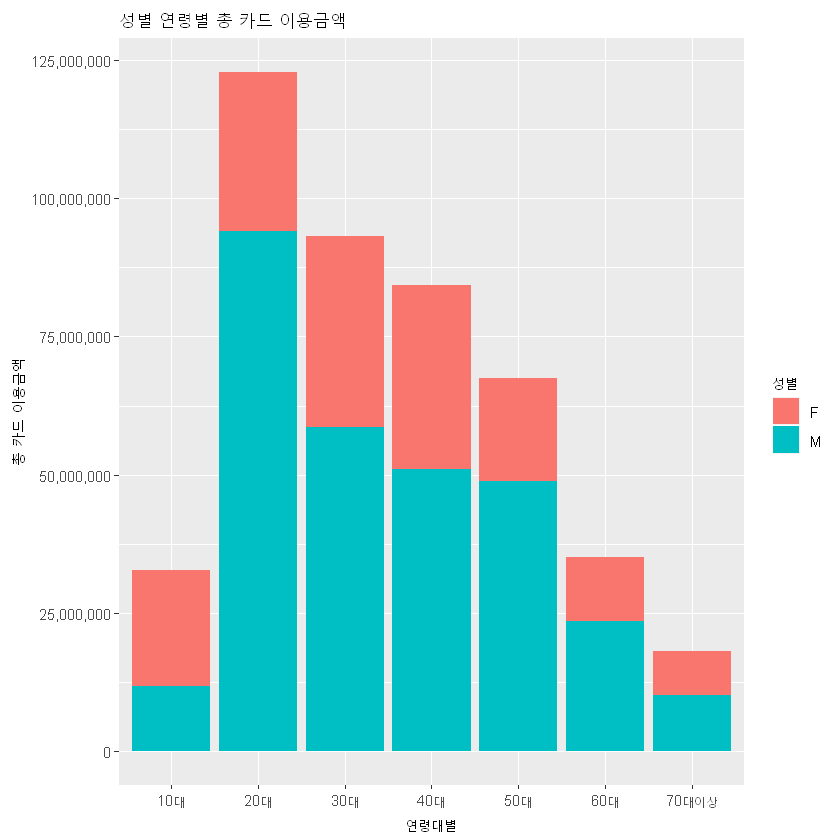

In [9]:
### 성별 연령별 총 카드 이용금액
ggplot(data1, aes(연령대별, 카드이용금액계, fill=성별)) +
  geom_col() +
  scale_y_continuous(labels = scales::comma) +
  labs(title='성별 연령별 총 카드 이용금액',
       y= '총 카드 이용금액')

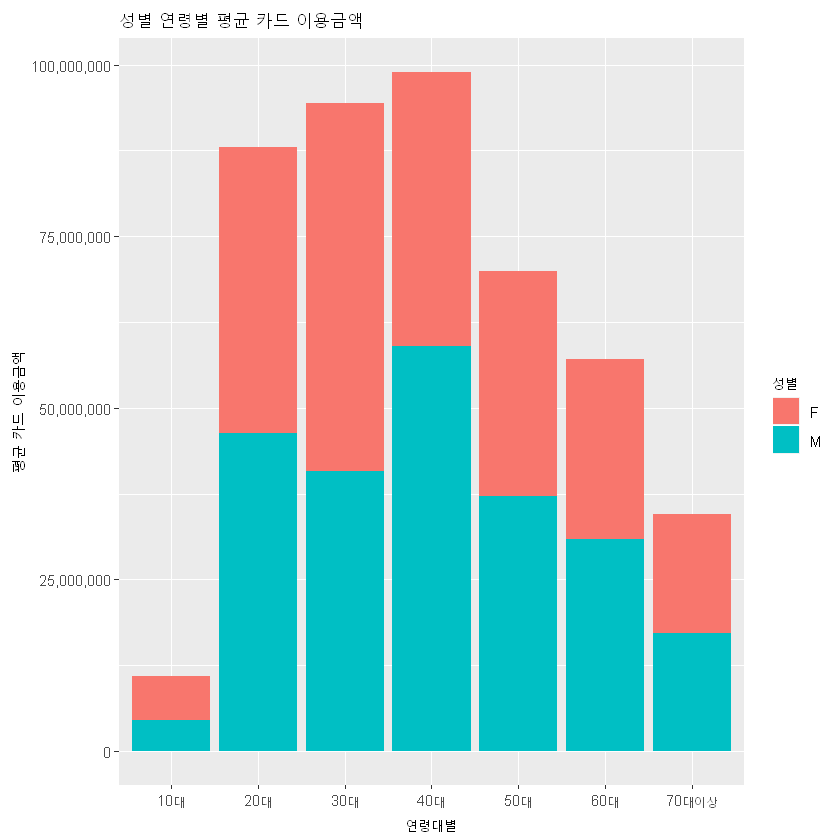

In [10]:
### 성별 연령별 평균 카드 이용금액
ggplot(data1, aes(연령대별, mean(카드이용금액계), fill=성별)) +
  geom_col() +
  scale_y_continuous(labels = scales::comma) +
  labs(title='성별 연령별 평균 카드 이용금액',
       y= '평균 카드 이용금액')

=> 총 카드 이용금액은 20대가 가장 많으나, 평균 이용 금액은 40대가 가장 많다. 

In [11]:
# 블록별 성별연령대별 카드소비패턴파일과 카드소비 업종코드의 업종코드 기준으로 결합
names(data5) <- c('업종코드', '대분류', '중분류', '소분류')

# data1의 업종코드 소문자로 변경
data1$업종코드 <- tolower(data1$업종코드)

# 병합한 데이터를 data6 변수로 저장
data6 <- inner_join(data1, data5, by='업종코드')

# NA값이 있는지 확인
table(is.na(data6))
# 결측치는 없음

Warning message:
"Column `업종코드` joining character vector and factor, coercing into character vector"


FALSE 
 5000 

In [12]:
### 업종별 그래프 ###
# 대분류별로 그룹
upjong <- sort(table(data6$대분류), decreasing = T)

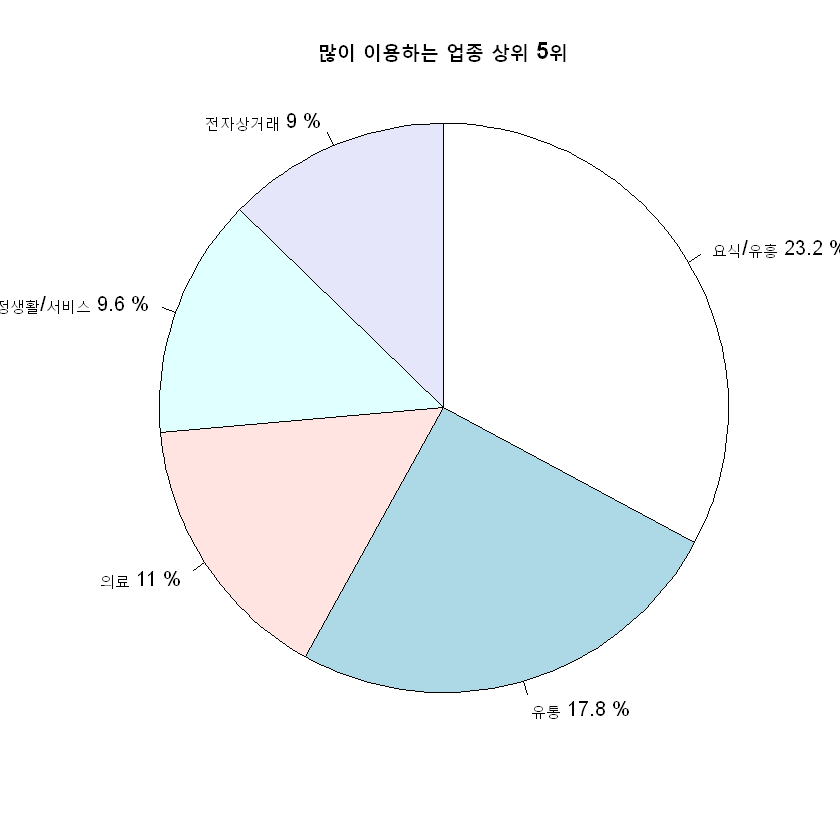

In [13]:
# 많이 이용하는 업종 상위 5위
pie(head(upjong,5),
    radius=1,
    init.angle = 90,
    clockwise = T,
    label=paste(names(upjong), (upjong/sum(upjong)) *100, '%'))

title(main='많이 이용하는 업종 상위 5위',
      font.main=2)

먹고 사고 하는 것이 제일 많다

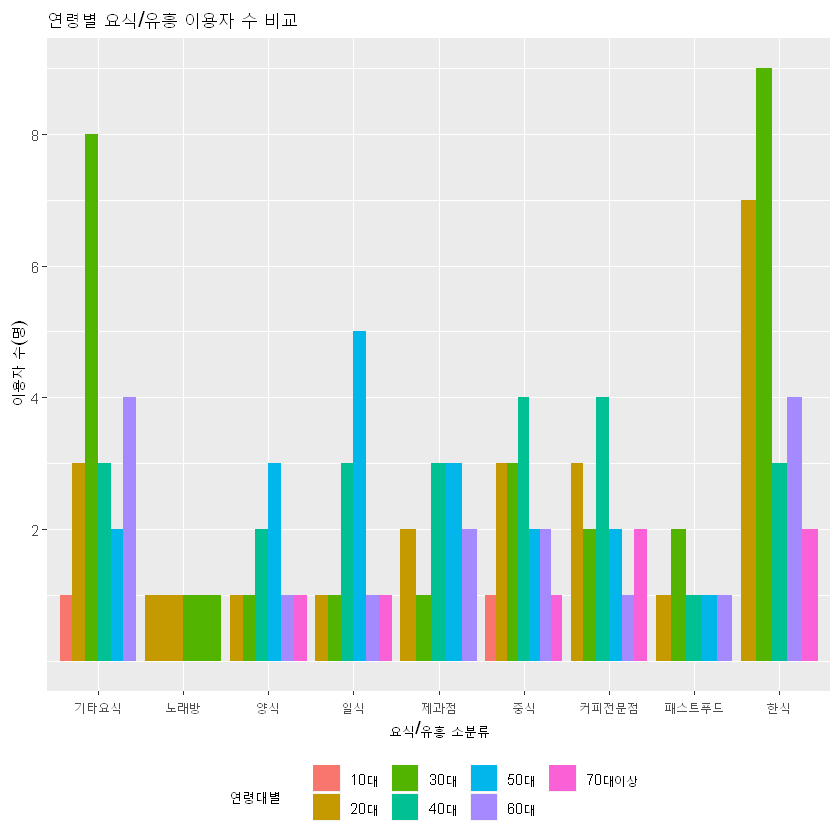

In [14]:
### 가장 많은 요식/유흥 중 소분류 관한 그래프
code1_1 <- data6 %>% filter(대분류=='요식/유흥')

ggplot(code1_1, aes(소분류, fill=연령대별)) +
  geom_bar(position = 'dodge') +
  scale_y_continuous(breaks = c(2,4,6,8,10)) +
  labs(title='연령별 요식/유흥 이용자 수 비교',
       x='요식/유흥 소분류',
       y='이용자 수(명)') +
  theme(legend.position='bottom')

=> 30대는 한식을 가장 많이 이용하고, 중식은 10대부터 70대 이상 모두 이용하는 것을 알 수 있다.

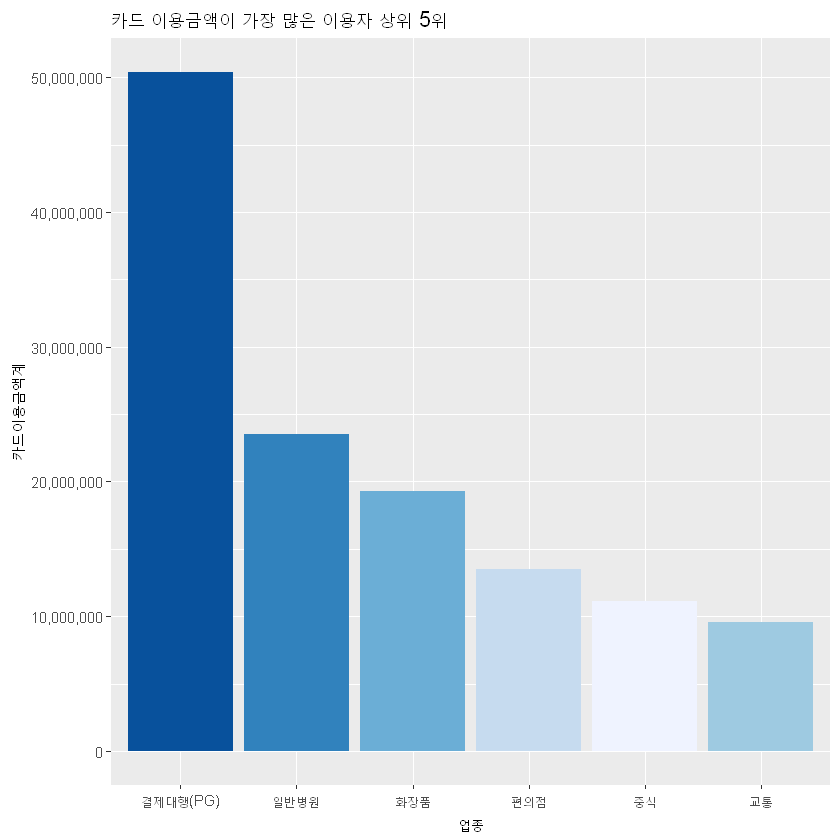

In [15]:
### 카드 이용금액이 가장 많은 이용자 상위 5위 
card_money <- data6 %>% arrange(desc(카드이용금액계)) %>% head()

ggplot(card_money, aes(reorder(소분류, -카드이용금액계), 카드이용금액계)) +
  geom_col(aes(fill=업종코드)) +
  scale_y_continuous(labels = scales::comma) +  # y축 1천단위
  labs(title = '카드 이용금액이 가장 많은 이용자 상위 5위',
       x='업종') +
  scale_fill_brewer(palette = 'Blues') +
  theme(legend.position='none') # 범례표시X

=> 이용금액이 가장 큰 곳은 결제대행이며 약 5천만원 이용, 1위와 2위의 금액 차이가 크다

업종코드,기준년월,고객주소블록코드,성별,연령대별,카드이용금액계,카드이용건수계,대분류,중분류,소분류
ss065,201810,156724,F,60대,14336,795,자동차,자동차서비스/용품,자동차용품
ss029,201703,216069,F,50대,414975,684,스포츠/문화/레저,스포츠/문화/레저,스포츠시설
ss019,201608,362333,F,50대,75450,488,음/식료품,음/식료품,농수산물
ss012,202011,15727,F,30대,129774,463,유통,백화점,백화점
ss068,202003,411608,F,40대,850070,423,전자상거래,전자상거래,온라인거래


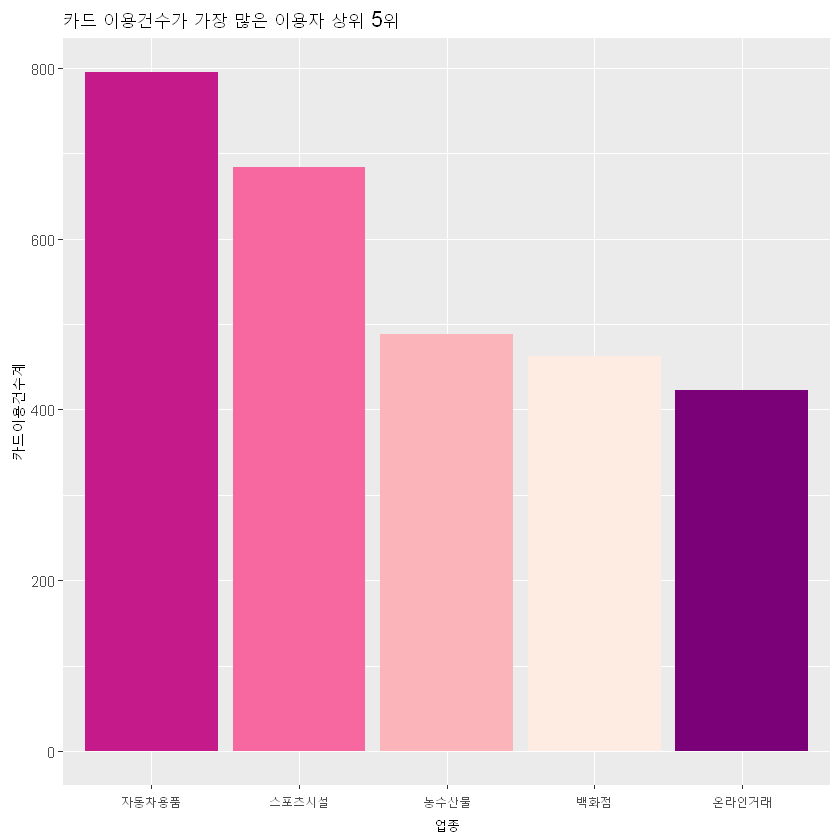

In [16]:
### 카드 이용건수가 가장 많은 이용자 상위 5위
card_use <- data6 %>% arrange(desc(카드이용건수계)) %>% head(5)
card_use

ggplot(card_use, aes(reorder(소분류, -카드이용건수계), 카드이용건수계)) +
  geom_col(aes(fill=업종코드)) +
  labs(title = '카드 이용건수가 가장 많은 이용자 상위 5위',
       x='업종') +
  scale_fill_brewer(palette = 'RdPu') +
  theme(legend.position='none') # 범례표시X

=> 이용건수가 가장 많은 곳은 자동차용품에 약 800건이다.

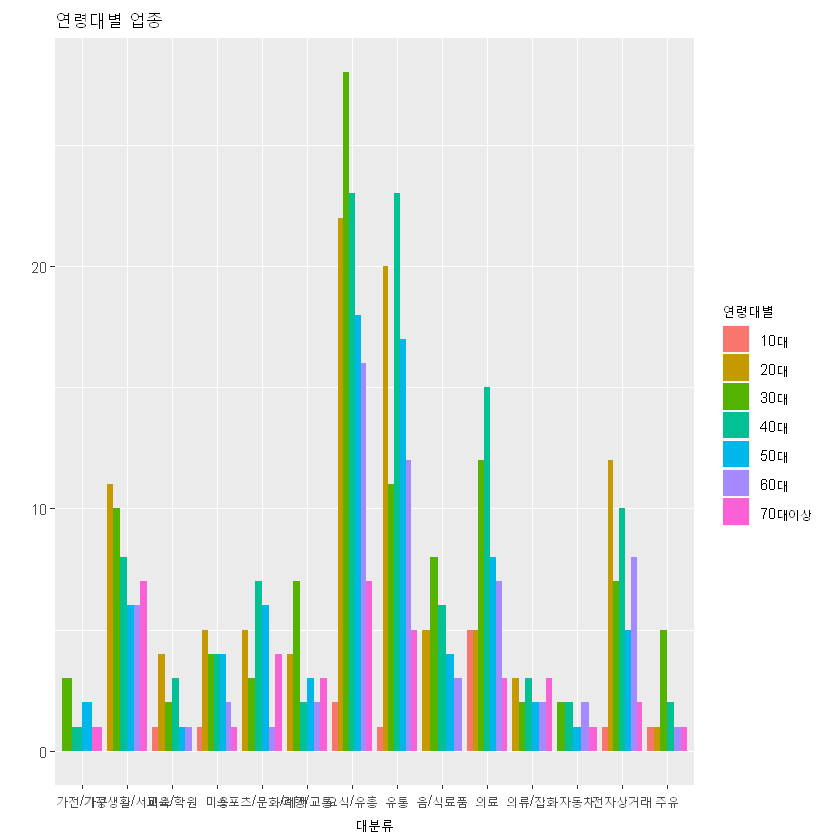

In [18]:
### 연령별, 성별 업종 비교
ggplot(data6, aes(대분류, fill=연령대별)) +
  geom_bar(position='dodge') +
  labs(title='연령대별 업종',
       y='')

=> 대부분의 모든 연령대가 요식/유흥이 가장 많다.

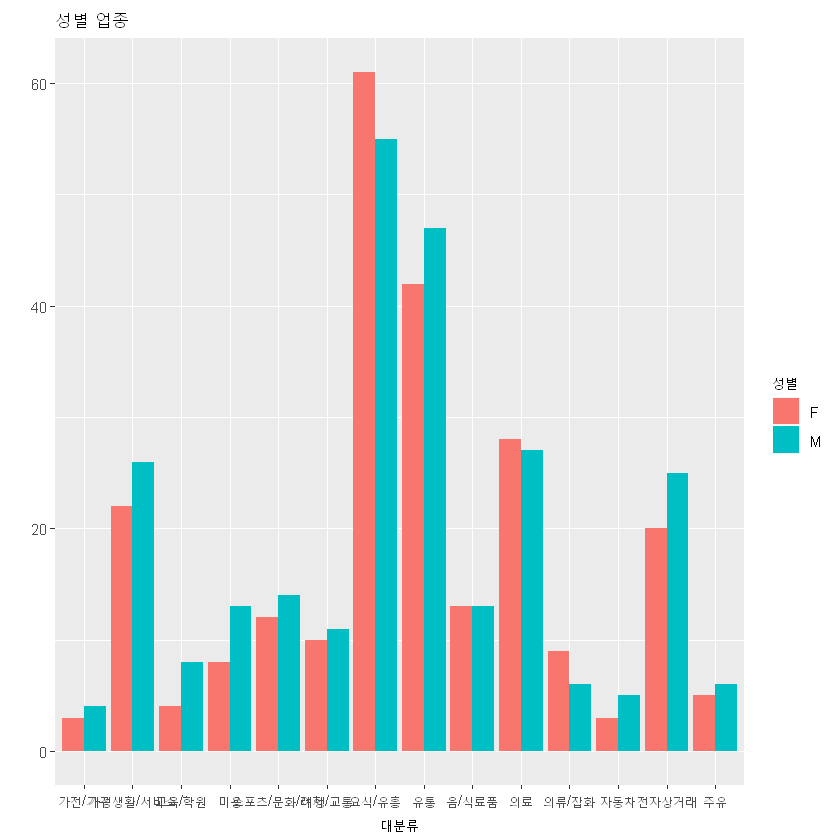

In [20]:
### 성별 업종
ggplot(data6, aes(대분류, fill=성별)) +
  geom_bar(position='dodge') +
  labs(title='성별 업종',
       y='')

=> 남녀모두 요식/유흥이 가장 많다. 남녀노소 먹는데에 진심

In [21]:
# 기준년월을 date화 시켜서 계절별로 묶고 성별 음식점 소분류마다 비율
# 계절 컬럼 추가
# 월 컬럼 생성
data6$월 <- str_sub(data6$기준년월,start = 5, end = 6)
data6$월 <- as.integer(data6$월)
# 계절 df생성
season <- data.frame('월'= c(1:12),'계절'=c('겨울','겨울','봄','봄','봄','여름','여름','여름','가을','가을','가을','겨울'))
season
# 병합
data6_1 <- inner_join(data6, season, by='월')
# 월 컬럼 제거
data6_1 <- subset(data6_1, select=-월)

월,계절
1,겨울
2,겨울
3,봄
4,봄
5,봄
6,여름
7,여름
8,여름
9,가을
10,가을


In [22]:
### 계절별 어떤 음식을 많이 먹는지 확인
code1_1$월 <- str_sub(code1_1$기준년월,start = 5, end = 6)
code1_1$월 <- as.integer(code1_1$월)
data6_2 <- inner_join(code1_1, season, by='월')

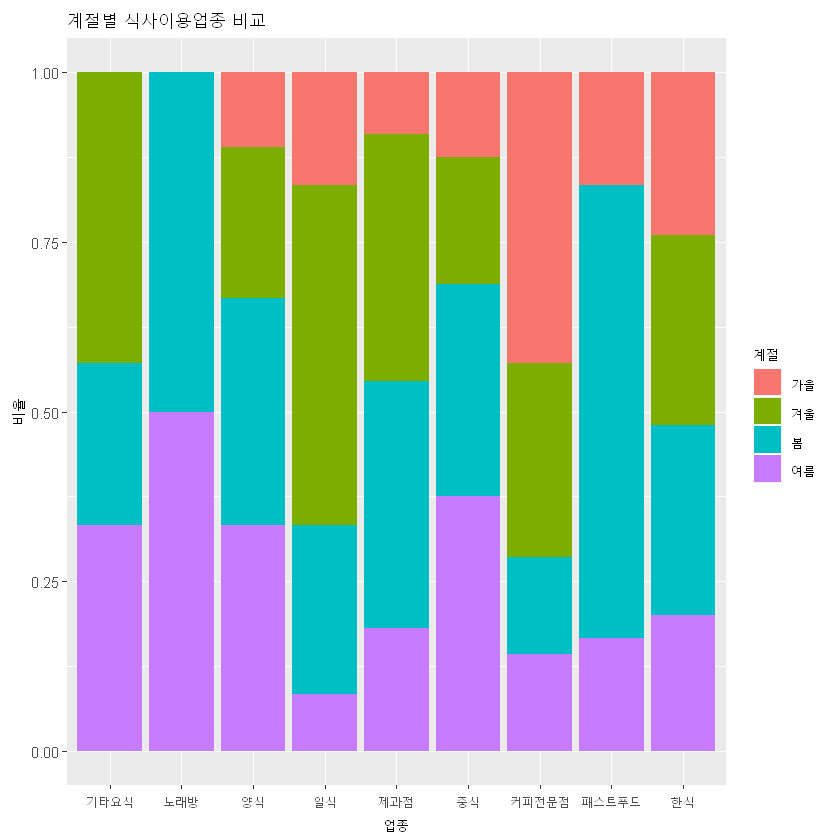

In [23]:
ggplot(data6_2, aes(소분류, fill=계절)) +
  geom_bar(position='fill') +
  labs(title='계절별 식사이용업종 비교',
       x='업종',
       y='비율')

=> 한식은 사계절 모두 비슷하게 이용하나, 패스트푸드는 봄에 이용률이 높다.
    일식은 식중독 때문일지 몰라도 여름이 가장 적고, 겨울이 가장 크다.

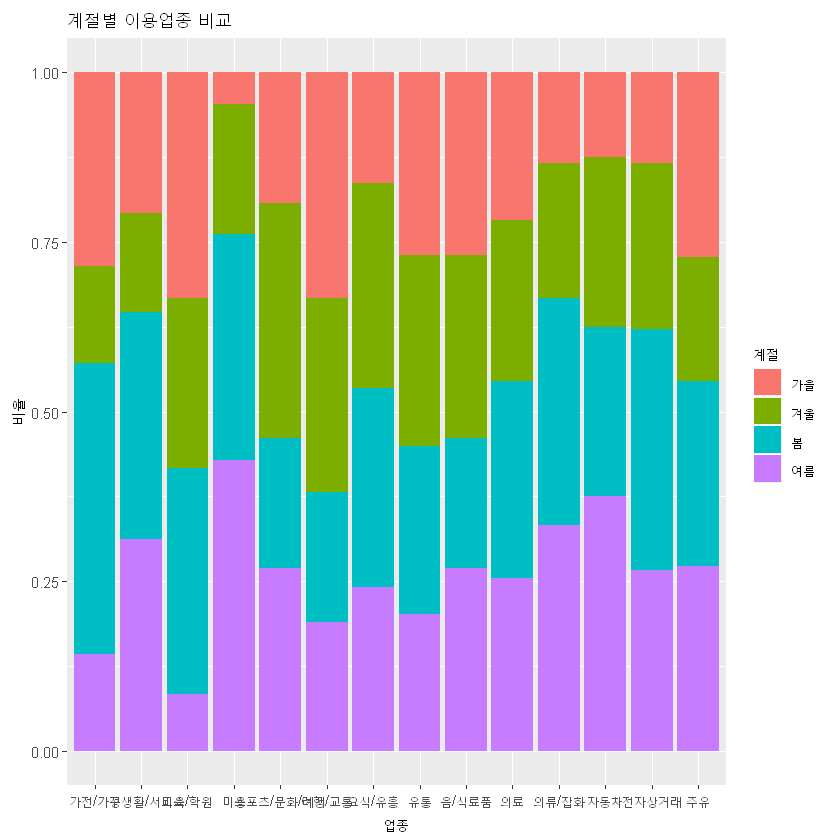

In [24]:
### 계절별 이용 업종 비교
ggplot(data6_1, aes(대분류, fill=계절)) +
  geom_bar(position='fill') +
  labs(title='계절별 이용업종 비교',
       x='업종',
       y='비율') 

=> 봄에 가전/가구가 많아 신혼부부 혼수 장만으로 예상, 생활에 있어 기본적인 항목(유통, 음/식료품, 의료, 주유)은 비율이 비슷하다.

***
# data2_블록별 시간대별소액결제건수 카드소비패턴
***
- 시간대별 업종비교
- 시간대별 먹는 음식


#### 시간대구간 *출처 : 서울특별시 빅데이터 캠퍼스 페이지 내 [빅데이터_캠퍼스_데이터_설명서.pdf] 파일 참고함
- 01 0~6
- 02 6~11
- 03 11~14
- 04 14~17
- 05 17~21
- 06 21~24

In [26]:
# 컬럼명 변경
names(data2) <- c('업종코드', '기준년월', '시간대구간','고객주소블록코드',
                  '카드이용금액계', '소액결제건수')

data2$업종코드 <- tolower(data2$업종코드)

# 병합한 데이터를 data7 변수로 저장
data7 <- inner_join(data2, data5, by='업종코드')
str(data7)
# 결측값 없음
table(is.na(data7))

data7$시간대구간 <- as.character(data7$시간대구간)


Warning message:
"Column `업종코드` joining character vector and factor, coercing into character vector"

'data.frame':	500 obs. of  9 variables:
 $ 업종코드        : chr  "ss017" "ss013" "ss016" "ss055" ...
 $ 기준년월        : int  202006 201608 201802 201906 201612 201606 202101 202011 201608 202102 ...
 $ 시간대구간      : int  6 6 3 2 5 1 6 2 2 6 ...
 $ 고객주소블록코드: int  11063 216137 224819 19869 28382 362903 17521 152539 157228 16708 ...
 $ 카드이용금액계  : int  257 86 35 10 10 20 10 75 10 15 ...
 $ 소액결제건수    : int  25 10 15 0 5 35 25 5 10 5 ...
 $ 대분류          : Factor w/ 14 levels "가전/가구","가정생활/서비스",..: 8 8 8 10 6 4 10 10 7 7 ...
 $ 중분류          : Factor w/ 33 levels "가전/가구","각종요금",..: 6 32 29 10 16 33 10 10 26 5 ...
 $ 소분류          : Factor w/ 75 levels "LPG","가구","가전",..: 9 69 66 47 70 75 56 56 62 8 ...



FALSE 
 4500 

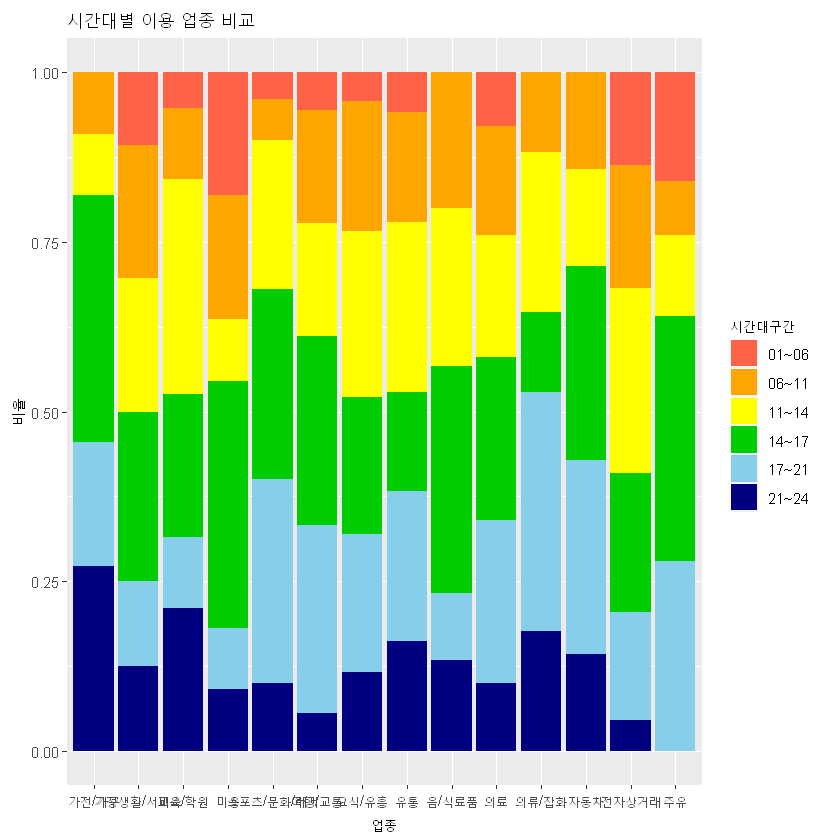

In [27]:
### 시간대별 업종비교
ggplot(data7, aes(대분류, fill=시간대구간)) +
  geom_bar(position='fill') +
  scale_fill_manual(name = '시간대구간',
                    values = c('tomato','orange','yellow','green3','skyblue','navy'),
                    labels = c('01~06','06~11', '11~14', '14~17', '17~21', '21~24')) +
  xlab('업종') +
  ylab('비율') +
  ggtitle('시간대별 이용 업종 비교')

=> 대부분의 업종에서 오후시간대에 이용(소비)이 더 많으며, 특히 주유는 퇴근시간대에 이용 비율이 높은 것으로 보여진다.

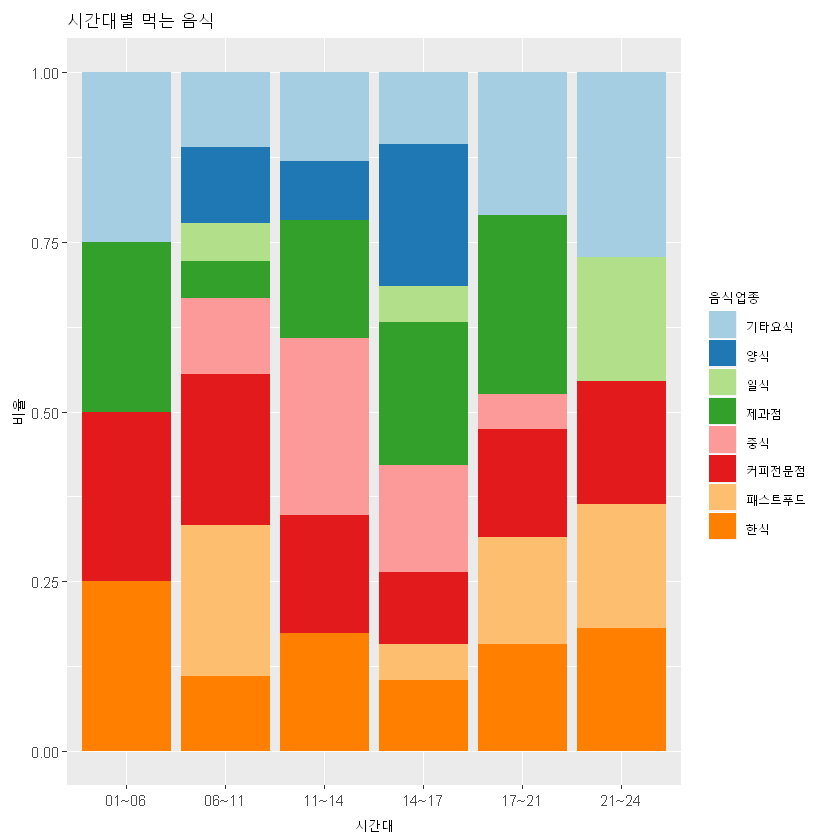

In [28]:
# 시간대별 어떤 음식을 먹는지 시각화
# 요식/유흥 업종 데이터 생성
eat <- data7 %>% filter(대분류 == '요식/유흥')

### 시간대별 먹는 음식
ggplot(eat, aes(시간대구간, fill=소분류)) +
  geom_bar(position='fill') +
  labs(title='시간대별 먹는 음식',
       y='비율',
       fill='음식업종') +
  scale_x_discrete('시간대', labels=c('01~06','06~11', '11~14', '14~17', '17~21', '21~24')) +
  scale_fill_brewer(palette = 'Paired')


=> 기타요식, 커피와 한식은 모든 시간대에 이용하고, 양식은 주로 낮시간대에 이용하는 것을 알 수 있다.

***
# data3_집계구별 일별소비지역별 카드소비패턴
***
- 광역시도별 고객 비율
- 시도별 카드 이용
    - 시도별 카드이용금액계
    - 시도별 카드이용건수계
- 서울 가맹점구별 카드이용금액
- 요식/유흥 에서 서울 자치구별 카드이용금액 합계 비교

In [29]:
# 컬럼명 변경
names(data3) <- c('가맹점주소광역시도','가맹점주소시군구','업종대분류','기준일자','고객주소집계구별','카드이용금액계','카드이용건수계')

In [30]:
table(data3$가맹점주소시군구)
# 시군구열에 아무 문자 없는 것이 58개임, 지우고 새로운 변수로 저장
data3_1 <- data3[!(data3$가맹점주소시군구 == "" ), ]
table(data3_1$가맹점주소시군구)

data3_1 %>% 
  filter(가맹점주소광역시도=='서울')
# 시도와 자치구가 제대로 연결되지 않은 행은 시도를 제대로 고쳐줌
unique(data3_1$가맹점주소시군구)


           가평군   강남구   강동구   강북구   강서구   강화군   고양시 
      58        2       29        6        2       11        1        9 
  관악구   광명시   광주시   광진구   구로구   구리시   금천구   김포시 
       9        1        2       10       12        5        3        2 
  남동구 남양주시   노원구   도봉구 동대문구   동작구   마포구   부천시 
       1        4        4        4        2       14       38        7 
  부평구 서대문구   서초구   성남시   성동구   성북구   송파구   수원시 
       3       16       18       18       11       11       26        2 
  시흥시   안산시   안양시   양주시   양천구   양평군   연수구 영등포구 
       3        2        2        2        6        1        1       17 
  오산시   옹진군   용산구   용인시   은평구 의정부시   이천시   종로구 
       1        1       23        7        7        5        1       11 
    중구   중랑구   파주시   평택시   하남시   화성시 
      39       10        9        2        2        7 


           가평군   강남구   강동구   강북구   강서구   강화군   고양시 
       0        2       29        6        2       11        1        9 
  관악구   광명시   광주시   광진구   구로구   구리시   금천구   김포시 
       9        1        2       10       12        5        3        2 
  남동구 남양주시   노원구   도봉구 동대문구   동작구   마포구   부천시 
       1        4        4        4        2       14       38        7 
  부평구 서대문구   서초구   성남시   성동구   성북구   송파구   수원시 
       3       16       18       18       11       11       26        2 
  시흥시   안산시   안양시   양주시   양천구   양평군   연수구 영등포구 
       3        2        2        2        6        1        1       17 
  오산시   옹진군   용산구   용인시   은평구 의정부시   이천시   종로구 
       1        1       23        7        7        5        1       11 
    중구   중랑구   파주시   평택시   하남시   화성시 
      39       10        9        2        2        7 

가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
서울,강남구,전자상거래,20201021,1.123077e+12,251500,25
서울,관악구,요식/유흥,20170312,1.112052e+12,158445,20
서울,마포구,주유,20161205,1.113068e+12,8048,15
서울,동작구,의료,20201210,1.105066e+12,22635,5
서울,중구,유통,20170405,1.119076e+12,182710,15
서울,송파구,가정생활/서비스,20190524,1.106080e+12,150900,5
서울,중구,음/식료품,20160731,1.105054e+12,175044,5
서울,강남구,전자상거래,20160412,1.121052e+12,251500,20
서울,용산구,요식/유흥,20190926,1.111078e+12,936586,10
서울,성북구,스포츠/문화/레저,20200520,1.104067e+12,452700,5


[1] 강남구   관악구   마포구   동작구   종로구   송파구   용인시   중구    
 [9] 용산구   성북구   노원구   서초구   강서구   중랑구   화성시   남양주시
[17] 가평군   서대문구 광진구   부천시   양천구   파주시   영등포구 수원시  
[25] 구리시   성남시   도봉구   광주시   은평구   옹진군   구로구   시흥시  
[33] 동대문구 강동구   안산시   고양시   김포시   평택시   성동구   강북구  
[41] 이천시   연수구   의정부시 양주시   남동구   금천구   부평구   오산시  
[49] 강화군   하남시   광명시   안양시   양평군  
54 Levels:  가평군 강남구 강동구 강북구 강서구 강화군 고양시 관악구 ... 화성시

In [31]:
data3_1 %>% 
  filter(가맹점주소광역시도=='서울') %>% 
  filter(str_sub(가맹점주소시군구,3,3)=='시')
# 가맹점주소광역시도가 서울이고, 시군구가 -시로 끝나는 곳은 모두 경기임, 수정해야함

가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
서울,화성시,유통,20190219,1.119062e+12,149894,5
서울,용인시,요식/유흥,20161008,1.111059e+12,455718,5
서울,부천시,유통,20190624,1.116061e+12,15090,30
서울,파주시,여행/교통,20171211,1.117052e+12,226752,10
서울,용인시,유통,20200309,1.124055e+12,22635,5
서울,수원시,요식/유흥,20200828,1.106087e+12,50300,5
서울,광주시,유통,20200529,1.125059e+12,57342,5
서울,시흥시,요식/유흥,20191219,1.120052e+12,119211,5
서울,안산시,요식/유흥,20200108,1.124058e+12,5030,10
서울,고양시,의료,20180618,1.113068e+12,135810,5


In [32]:
#🚨여기서부터 어마어마하게 고된 전처리 입니다.. 밑으로 주와악 내려주세요.. 더 효율적인 방법을 찾아보겠습니다..

# 서울 자치구
# '강남구','강동구','강북구','강서구','관악구','광진구','구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구'
unique(data3_1$가맹점주소시군구)
#  [1] "강남구"   "관악구"   "마포구"   "동작구"   "종로구"   "송파구"   "용인시"   "중구"     "용산구"   "성북구"  
# [11] "노원구"   "서초구"   "강서구"   "중랑구"   "화성시"   "남양주시" "가평군"   "서대문구" "광진구"   "부천시"  
# [21] "양천구"   "파주시"   "영등포구" "수원시"   "구리시"   "성남시"   "도봉구"   "광주시"   "은평구"   "옹진군"  
# [31] "구로구"   "시흥시"   "동대문구" "강동구"   "안산시"   "고양시"   "김포시"   "평택시"   "성동구"   "강북구"  
# [41] "이천시"   "연수구"   "의정부시" "양주시"   "남동구"   "금천구"   "부평구"   "오산시"   "강화군"   "하남시"  
# [51] "광명시"   "안양시"   "양평군"  

# 여기서 서울 외 자치구 찾기
# "용인시" "화성시" "남양주시" "가평군" "부천시" "파주시" "수원시" "구리시" "성남시" "광주시" "옹진군" "구로구"   "시흥시" "안산시" "고양시" "김포시" "평택시" "이천시" "연수구" "의정부시" "양주시" "남동구" "부평구" "오산시" "강화군" "하남시" "광명시" "안양시" "양평군"


# 이 중에서 연수구, 남동구, 강화군(인천) 외 모두 경기
# "용인시" "화성시" "남양주시" "가평군" "부천시" "파주시" "수원시" "구리시" "성남시" "광주시" "옹진군" "구로구" "시흥시" "안산시" "고양시" "김포시" "평택시" "이천시" "의정부시" "양주시" "부평구" "오산시" "하남시" "광명시"   "안양시" "양평군"

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 강남구   관악구   마포구   동작구   종로구   송파구   용인시   중구    
 [9] 용산구   성북구   노원구   서초구   강서구   중랑구   화성시   남양주시
[17] 가평군   서대문구 광진구   부천시   양천구   파주시   영등포구 수원시  
[25] 구리시   성남시   도봉구   광주시   은평구   옹진군   구로구   시흥시  
[33] 동대문구 강동구   안산시   고양시   김포시   평택시   성동구   강북구  
[41] 이천시   연수구   의정부시 양주시   남동구   금천구   부평구   오산시  
[49] 강화군   하남시   광명시   안양시   양평군  
54 Levels:  가평군 강남구 강동구 강북구 강서구 강화군 고양시 관악구 ... 화성시

In [33]:
# 서울 자치구 수정
data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '강남구',]
# 35 76 205 210 240 397 435행 시도 서울로 변경
data3_1['35',]$가맹점주소광역시도 <- '서울'
data3_1['76',]$가맹점주소광역시도 <- '서울'
data3_1['205',]$가맹점주소광역시도 <- '서울'
data3_1['210',]$가맹점주소광역시도 <- '서울'
data3_1['240',]$가맹점주소광역시도 <- '서울'
data3_1['397',]$가맹점주소광역시도 <- '서울'
data3_1['435',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '강동구',]
data3_1['319',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '강북구',]

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '강서구',]
data3_1['21',]$가맹점주소광역시도 <- '서울'
data3_1['144',]$가맹점주소광역시도 <- '서울'
data3_1['461',]$가맹점주소광역시도 <- '서울'
data3_1['480',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '관악구',]
data3_1['83',]$가맹점주소광역시도 <- '서울'
data3_1['100',]$가맹점주소광역시도 <- '서울'
data3_1['311',]$가맹점주소광역시도 <- '서울'
data3_1['482',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '광진구',]
data3_1['34',]$가맹점주소광역시도 <- '서울'
data3_1['106',]$가맹점주소광역시도 <- '서울'
data3_1['227',]$가맹점주소광역시도 <- '서울'
data3_1['235',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '구로구',]
data3_1['78',]$가맹점주소광역시도 <- '서울'
data3_1['429',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '금천구',]

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '노원구',]

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '도봉구',]
data3_1['60',]$가맹점주소광역시도 <- '서울'
data3_1['377',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '동대문구',]
data3_1['159',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '동작구',]
data3_1['92',]$가맹점주소광역시도 <- '서울'
data3_1['179',]$가맹점주소광역시도 <- '서울'
data3_1['368',]$가맹점주소광역시도 <- '서울'
data3_1['384',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '마포구',]
data3_1['6',]$가맹점주소광역시도 <- '서울'
data3_1['12',]$가맹점주소광역시도 <- '서울'
data3_1['40',]$가맹점주소광역시도 <- '서울'
data3_1['113',]$가맹점주소광역시도 <- '서울'
data3_1['131',]$가맹점주소광역시도 <- '서울'
data3_1['172',]$가맹점주소광역시도 <- '서울'
data3_1['276',]$가맹점주소광역시도 <- '서울'
data3_1['296',]$가맹점주소광역시도 <- '서울'
data3_1['410',]$가맹점주소광역시도 <- '서울'
data3_1['500',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '서대문구',]
data3_1['82',]$가맹점주소광역시도 <- '서울'
data3_1['192',]$가맹점주소광역시도 <- '서울'
data3_1['260',]$가맹점주소광역시도 <- '서울'
data3_1['271',]$가맹점주소광역시도 <- '서울'
data3_1['284',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '서초구',]
data3_1['156',]$가맹점주소광역시도 <- '서울'
data3_1['300',]$가맹점주소광역시도 <- '서울'
data3_1['411',]$가맹점주소광역시도 <- '서울'
data3_1['463',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '성동구',]
data3_1['94',]$가맹점주소광역시도 <- '서울'
data3_1['182',]$가맹점주소광역시도 <- '서울'
data3_1['450',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '성북구',]

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '송파구',]
data3_1['7',]$가맹점주소광역시도 <- '서울'
data3_1['37',]$가맹점주소광역시도 <- '서울'
data3_1['111',]$가맹점주소광역시도 <- '서울'
data3_1['119',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '양천구',]
data3_1['63',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '영등포구',]
data3_1['352',]$가맹점주소광역시도 <- '서울'
data3_1['399',]$가맹점주소광역시도 <- '서울'
data3_1['403',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '용산구',]
data3_1['163',]$가맹점주소광역시도 <- '서울'
data3_1['202',]$가맹점주소광역시도 <- '서울'
data3_1['455',]$가맹점주소광역시도 <- '서울'
data3_1['486',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '은평구',]
data3_1['230',]$가맹점주소광역시도 <- '서울'
data3_1['290',]$가맹점주소광역시도 <- '서울'
data3_1['427',]$가맹점주소광역시도 <- '서울'


data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '종로구',]
data3_1['7',]$가맹점주소광역시도 <- '서울'
data3_1['37',]$가맹점주소광역시도 <- '서울'
data3_1['111',]$가맹점주소광역시도 <- '서울'
data3_1['119',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '중구',]
# 강원, 경기, 제주의 중구는 서울로 변경
data3_1['114',]$가맹점주소광역시도 <- '서울'
data3_1['200',]$가맹점주소광역시도 <- '서울'
data3_1['223',]$가맹점주소광역시도 <- '서울'
data3_1['281',]$가맹점주소광역시도 <- '서울'
data3_1['351',]$가맹점주소광역시도 <- '서울'
data3_1['395',]$가맹점주소광역시도 <- '서울'
data3_1['467',]$가맹점주소광역시도 <- '서울'

data3_1[data3_1$가맹점주소광역시도!='서울' & data3_1$가맹점주소시군구 == '중랑구',]
data3_1['62',]$가맹점주소광역시도 <- '서울'
data3_1['170',]$가맹점주소광역시도 <- '서울'
data3_1['307',]$가맹점주소광역시도 <- '서울'

# 서울인데 자치구가 시로 끝나는 곳 수정
data3_1[data3_1$가맹점주소광역시도=='서울'& str_sub(data3_1$가맹점주소시군구,3,3)=='시',]
data3_1['23',]$가맹점주소광역시도 <- '경기'
data3_1['24',]$가맹점주소광역시도 <- '경기'
data3_1['38',]$가맹점주소광역시도 <- '경기'
data3_1['44',]$가맹점주소광역시도 <- '경기'
data3_1['50',]$가맹점주소광역시도 <- '경기'
data3_1['52',]$가맹점주소광역시도 <- '경기'
data3_1['65',]$가맹점주소광역시도 <- '경기'
data3_1['79',]$가맹점주소광역시도 <- '경기'
data3_1['90',]$가맹점주소광역시도 <- '경기'
data3_1['95',]$가맹점주소광역시도 <- '경기'
data3_1['99',]$가맹점주소광역시도 <- '경기'
data3_1['102',]$가맹점주소광역시도 <- '경기'
data3_1['110',]$가맹점주소광역시도 <- '경기'
data3_1['116',]$가맹점주소광역시도 <- '경기'
data3_1['120',]$가맹점주소광역시도 <- '경기'
data3_1['128',]$가맹점주소광역시도 <- '경기'
data3_1['138',]$가맹점주소광역시도 <- '경기'
data3_1['146',]$가맹점주소광역시도 <- '경기'
data3_1['148',]$가맹점주소광역시도 <- '경기'
data3_1['150',]$가맹점주소광역시도 <- '경기'
data3_1['158',]$가맹점주소광역시도 <- '경기'
data3_1['162',]$가맹점주소광역시도 <- '경기'
data3_1['176',]$가맹점주소광역시도 <- '경기'
data3_1['184',]$가맹점주소광역시도 <- '경기'
data3_1['190',]$가맹점주소광역시도 <- '경기'
data3_1['193',]$가맹점주소광역시도 <- '경기'
data3_1['198',]$가맹점주소광역시도 <- '경기'
data3_1['201',]$가맹점주소광역시도 <- '경기'
data3_1['216',]$가맹점주소광역시도 <- '경기'
data3_1['226',]$가맹점주소광역시도 <- '경기'
data3_1['258',]$가맹점주소광역시도 <- '경기'
data3_1['268',]$가맹점주소광역시도 <- '경기'
data3_1['275',]$가맹점주소광역시도 <- '경기'
data3_1['280',]$가맹점주소광역시도 <- '경기'
data3_1['288',]$가맹점주소광역시도 <- '경기'
data3_1['295',]$가맹점주소광역시도 <- '경기'
data3_1['305',]$가맹점주소광역시도 <- '경기'
data3_1['314',]$가맹점주소광역시도 <- '경기'
data3_1['322',]$가맹점주소광역시도 <- '경기'
data3_1['326',]$가맹점주소광역시도 <- '경기'
data3_1['362',]$가맹점주소광역시도 <- '경기'
data3_1['364',]$가맹점주소광역시도 <- '경기'
data3_1['375',]$가맹점주소광역시도 <- '경기'
data3_1['385',]$가맹점주소광역시도 <- '경기'
data3_1['388',]$가맹점주소광역시도 <- '경기'
data3_1['394',]$가맹점주소광역시도 <- '경기'
data3_1['400',]$가맹점주소광역시도 <- '경기'
data3_1['407',]$가맹점주소광역시도 <- '경기'
data3_1['408',]$가맹점주소광역시도 <- '경기'
data3_1['409',]$가맹점주소광역시도 <- '경기'
data3_1['416',]$가맹점주소광역시도 <- '경기'
data3_1['422',]$가맹점주소광역시도 <- '경기'
data3_1['423',]$가맹점주소광역시도 <- '경기'
data3_1['428',]$가맹점주소광역시도 <- '경기'
data3_1['434',]$가맹점주소광역시도 <- '경기'
data3_1['438',]$가맹점주소광역시도 <- '경기'
data3_1['446',]$가맹점주소광역시도 <- '경기'
data3_1['447',]$가맹점주소광역시도 <- '경기'
data3_1['457',]$가맹점주소광역시도 <- '경기'
data3_1['474',]$가맹점주소광역시도 <- '경기'
data3_1[data3_1$가맹점주소광역시도=='서울'& str_sub(data3_1$가맹점주소시군구,4,4)=='시',]
data3_1['28',]$가맹점주소광역시도 <- '경기'
data3_1['185',]$가맹점주소광역시도 <- '경기'
data3_1['206',]$가맹점주소광역시도 <- '경기'
data3_1['289',]$가맹점주소광역시도 <- '경기'
data3_1['418',]$가맹점주소광역시도 <- '경기'
data3_1['421',]$가맹점주소광역시도 <- '경기'
data3_1['449',]$가맹점주소광역시도 <- '경기'


# 경기가 아닌데 자치구가 시로 끝나는 곳 수정
data3_1[data3_1$가맹점주소광역시도!='경기'& str_sub(data3_1$가맹점주소시군구,3,3)=='시',]
data3_1['57',]$가맹점주소광역시도 <- '경기'
data3_1['75',]$가맹점주소광역시도 <- '경기'
data3_1['91',]$가맹점주소광역시도 <- '경기'
data3_1['196',]$가맹점주소광역시도 <- '경기'
data3_1['215',]$가맹점주소광역시도 <- '경기'
data3_1['269',]$가맹점주소광역시도 <- '경기'
data3_1['325',]$가맹점주소광역시도 <- '경기'
data3_1['337',]$가맹점주소광역시도 <- '경기'
data3_1['393',]$가맹점주소광역시도 <- '경기'
data3_1['479',]$가맹점주소광역시도 <- '경기'

# 경기가 아닌데 자치구가 군으로 끝나는 곳
data3_1[data3_1$가맹점주소광역시도!='경기'& str_sub(data3_1$가맹점주소시군구,3,3)=='군',]
data3_1['30',]$가맹점주소광역시도 <- '경기'
data3_1['51',]$가맹점주소광역시도 <- '경기'
data3_1['459',]$가맹점주소광역시도 <- '경기'

# 그 외
data3_1[data3_1$가맹점주소광역시도!='서울'& data3_1$가맹점주소시군구=='연수구',]
data3_1['183',]$가맹점주소광역시도 <- '인천'

data3_1[data3_1$가맹점주소광역시도=='경기'& str_sub(data3_1$가맹점주소시군구,3,3)=='구',]
data3_1['8',]$가맹점주소광역시도 <- '서울'
data3_1['285',]$가맹점주소광역시도 <- '인천'
data3_1['316',]$가맹점주소광역시도 <- '서울'
data3_1['379',]$가맹점주소광역시도 <- '서울'
data3_1['420',]$가맹점주소광역시도 <- '서울'
data3_1['484',]$가맹점주소광역시도 <- '서울'
data3_1['373',]$가맹점주소광역시도 <- '서울'
data3_1['15',]$가맹점주소광역시도 <- '서울'
data3_1['217',]$가맹점주소광역시도 <- '서울'
data3_1['497',]$가맹점주소광역시도 <- '인천'

,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
35,대전,강남구,요식/유흥,20190304,1.120066e+12,432334,5
76,경기,강남구,음/식료품,20160320,1.122065e+12,58348,15
205,경기,강남구,유통,20170327,1.114074e+12,296770,5
210,경기,강남구,유통,20180704,1.110061e+12,149391,5
240,경기,강남구,음/식료품,20170223,1.125059e+12,15548,5
397,충남,강남구,전자상거래,20190101,1.121058e+12,160608,5
435,경기,강남구,요식/유흥,20200413,1.103063e+12,941415,10


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
319,경기,강동구,미용,20210213,1.112055e+12,236410,5


가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
21,제주,강서구,주유,20181025,1.106073e+12,82995,45
144,경기,강서구,가정생활/서비스,20160715,1.122053e+12,256530,20
461,경북,강서구,주유,20160907,1.108083e+12,58449,5
480,경기,강서구,요식/유흥,20200206,1.125073e+12,29174,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
83,충북,관악구,유통,20190920,1.111077e+12,44264,5
100,인천,관악구,스포츠/문화/레저,20161219,1.121071e+12,1241303,5
311,경기,관악구,미용,20180119,1.108084e+12,673416,5
482,강원,관악구,의료,20201021,1.116065e+12,266590,10


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
34,경기,광진구,요식/유흥,20190523,1.119074e+12,1069730,5
106,경북,광진구,유통,20180919,1.104056e+12,52815,10
227,충남,광진구,의류/잡화,20201014,1.112067e+12,201200,5
235,경기,광진구,음/식료품,20160315,1.105058e+12,1559300,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
78,충남,구로구,요식/유흥,20170909,1.111053e+12,15845,30
429,전북,구로구,요식/유흥,20200324,1.113062e+12,196170,10


가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계


가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
60,경기,도봉구,의료,20171026,1.12108e+12,251500,5
377,경기,도봉구,요식/유흥,20170426,1.11806e+12,224338,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
159,부산,동대문구,유통,20200613,1.112056e+12,249991,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
92,경기,동작구,요식/유흥,20190201,1.117051e+12,135810,5
179,강원,동작구,여행/교통,20161006,1.121083e+12,126253,5
368,경기,동작구,음/식료품,20190617,1.121064e+12,3311299,5
384,경기,동작구,유통,20170316,1.107068e+12,323932,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
6,경기,마포구,유통,20200319,1.108060e+12,20120,25
12,제주,마포구,음/식료품,20160204,1.108060e+12,503000,5
40,경남,마포구,요식/유흥,20190426,1.118054e+12,68509,10
113,경기,마포구,유통,20171022,1.107060e+12,16599,10
131,경기,마포구,요식/유흥,20180606,1.110062e+12,80882,5
172,경기,마포구,유통,20170711,1.121080e+12,2615600,10
276,경기,마포구,음/식료품,20201025,1.107065e+12,301448,86
296,경기,마포구,주유,20180928,1.120063e+12,114835,10
410,제주,마포구,요식/유흥,20201008,1.110060e+12,106636,10
500,인천,마포구,음/식료품,20210628,1.122052e+12,667481,116


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
82,경기,서대문구,스포츠/문화/레저,20210714,1.115071e+12,49797,5
192,경기,서대문구,유통,20170909,1.109072e+12,1376661,10
260,경기,서대문구,음/식료품,20171107,1.122053e+12,8048,5
271,대구,서대문구,요식/유흥,20170718,1.124054e+12,981856,5
284,경기,서대문구,전자상거래,20181122,1.111074e+12,867449,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
156,대전,서초구,유통,20160314,1.124081e+12,32947,5
300,대구,서초구,유통,20180707,1.124071e+12,503000,15
411,부산,서초구,스포츠/문화/레저,20160113,1.121061e+12,150900,30
463,경기,서초구,요식/유흥,20190417,1.114073e+12,419502,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
373,부산,성동구,유통,20160309,1.116066e+12,60360,10


가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
8,경기,송파구,요식/유흥,20160418,1.112058e+12,160457,50
15,경남,송파구,요식/유흥,20210110,1.119076e+12,125247,5
125,경북,송파구,전자상거래,20180508,1.108084e+12,45270,15
197,제주,송파구,요식/유흥,20160218,1.104059e+12,15543,5
316,경기,송파구,요식/유흥,20171115,1.124082e+12,251500,5
379,경기,송파구,전자상거래,20170713,1.116069e+12,55330,5
420,경기,송파구,전자상거래,20170503,1.116067e+12,50300,5
484,경기,송파구,전자상거래,20170703,1.123058e+12,12575,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
63,경기,양천구,유통,20210113,1.106091e+12,206230,10


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
352,전남,영등포구,가정생활/서비스,20180723,1.119073e+12,170014,101
399,충북,영등포구,전자상거래,20210504,1.114075e+12,25653,5
403,경기,영등포구,유통,20210621,1.116072e+12,54827,10


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
163,충북,용산구,유통,20170831,1.108081e+12,352100,5
202,경기,용산구,의류/잡화,20170827,1.123077e+12,251500,5
254,전남,용산구,요식/유흥,20170406,1.102071e+12,197060,5
455,경남,용산구,여행/교통,20201130,1.110053e+12,73438,5
486,경기,용산구,음/식료품,20210408,1.117069e+12,189812,15


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
230,경기,은평구,가정생활/서비스,20181024,1.102072e+12,209248,5
290,인천,은평구,미용,20200401,1.115053e+12,518090,5
427,경기,은평구,전자상거래,20180820,1.114059e+12,376138,30


가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
114,강원,중구,요식/유흥,20180823,1.120070e+12,192649,5
200,경기,중구,요식/유흥,20170216,1.103053e+12,581418,5
223,경기,중구,유통,20191206,1.115054e+12,75450,5
238,대구,중구,요식/유흥,20160409,1.104067e+12,50300,15
281,경기,중구,요식/유흥,20210630,1.113062e+12,45270,5
292,부산,중구,의류/잡화,20170116,1.102070e+12,25150,5
351,제주,중구,의료,20180610,1.105065e+12,14084,5
395,경기,중구,요식/유흥,20160131,1.124080e+12,16599,5
467,경기,중구,주유,20180131,1.108084e+12,22635,65


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
62,경기,중랑구,요식/유흥,20171220,1.114066e+12,35210,171
170,경기,중랑구,요식/유흥,20160702,1.106087e+12,381526,5
307,인천,중랑구,요식/유흥,20170423,1.119075e+12,245062,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
23,서울,화성시,유통,20190219,1.119062e+12,149894,5
24,서울,용인시,요식/유흥,20161008,1.111059e+12,455718,5
38,서울,부천시,유통,20190624,1.116061e+12,15090,30
44,서울,파주시,여행/교통,20171211,1.117052e+12,226752,10
50,서울,용인시,유통,20200309,1.124055e+12,22635,5
52,서울,수원시,요식/유흥,20200828,1.106087e+12,50300,5
65,서울,광주시,유통,20200529,1.125059e+12,57342,5
79,서울,시흥시,요식/유흥,20191219,1.120052e+12,119211,5
90,서울,안산시,요식/유흥,20200108,1.124058e+12,5030,10
95,서울,고양시,의료,20180618,1.113068e+12,135810,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
28,서울,남양주시,전자상거래,20161229,1.121068e+12,25150,25
185,서울,의정부시,요식/유흥,20180403,1.104066e+12,440226,5
206,서울,의정부시,유통,20160412,1.121069e+12,1825085,15
289,서울,의정부시,유통,20160908,1.112068e+12,18108,5
418,서울,의정부시,유통,20180524,1.111052e+12,30180,5
421,서울,남양주시,유통,20210317,1.110051e+12,100097,5
449,서울,남양주시,주유,20180514,1.124079e+12,123336,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
57,경북,구리시,유통,20180108,1.124060e+12,15090,10
75,인천,구리시,유통,20170116,1.120072e+12,898936,5
91,대구,파주시,전자상거래,20191225,1.115071e+12,45270,20
196,강원,성남시,음/식료품,20181121,1.123065e+12,10060,10
215,충남,양주시,유통,20180428,1.105059e+12,21629,15
269,강원,고양시,교육/학원,20210531,1.110055e+12,10563,5
325,부산,용인시,가전/가구,20171008,1.120073e+12,60360,5
337,인천,하남시,요식/유흥,20190808,1.124080e+12,258039,40
393,경북,성남시,유통,20160112,1.111064e+12,254015,5
479,대전,파주시,가정생활/서비스,20190301,1.124069e+12,140840,10


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
30,서울,가평군,유통,20160219,1.114077e+12,29677,10
51,부산,가평군,유통,20201225,1.108076e+12,513060,15
459,서울,양평군,전자상거래,20160507,1.116051e+12,18108,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
183,대구,연수구,요식/유흥,20171215,1.105059e+12,31186,5


,가맹점주소광역시도,가맹점주소시군구,업종대분류,기준일자,고객주소집계구별,카드이용금액계,카드이용건수계
8,경기,송파구,요식/유흥,20160418,1.112058e+12,160457,50
285,경기,부평구,전자상거래,20160715,1.124071e+12,226350,20
316,경기,송파구,요식/유흥,20171115,1.124082e+12,251500,5
379,경기,송파구,전자상거래,20170713,1.116069e+12,55330,5
420,경기,송파구,전자상거래,20170503,1.116067e+12,50300,5
484,경기,송파구,전자상거래,20170703,1.123058e+12,12575,5


스크롤 내리느라 고생 많으셨습니다..

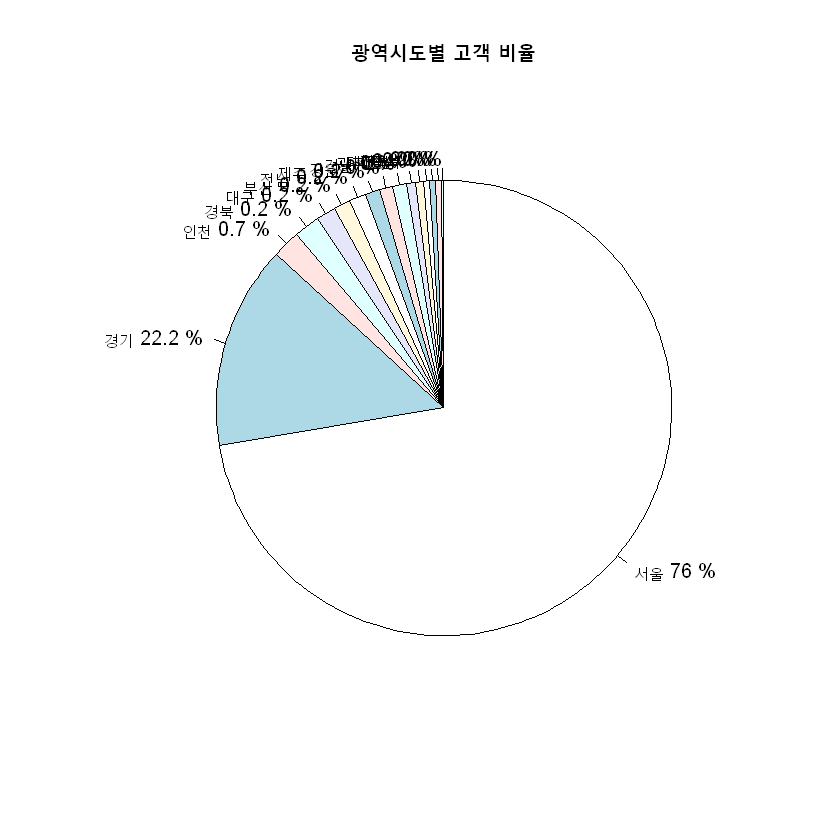

In [42]:
### 광역시도별 고객 비율
sido <- round(sort(table(data3_1$가맹점주소광역시도), decreasing = T)/sum(sort(table(data3_1$가맹점주소광역시도), decreasing = T))*100,1)

pie(sort(table(data3$가맹점주소광역시도), decreasing = T),
    init.angle=90,
    clockwise = T,
    label=paste(names(sido),sido,'%'))
title(main='광역시도별 고객 비율',
      font.main=2)

=> 수도권이 약 98%이상을 차지한다.

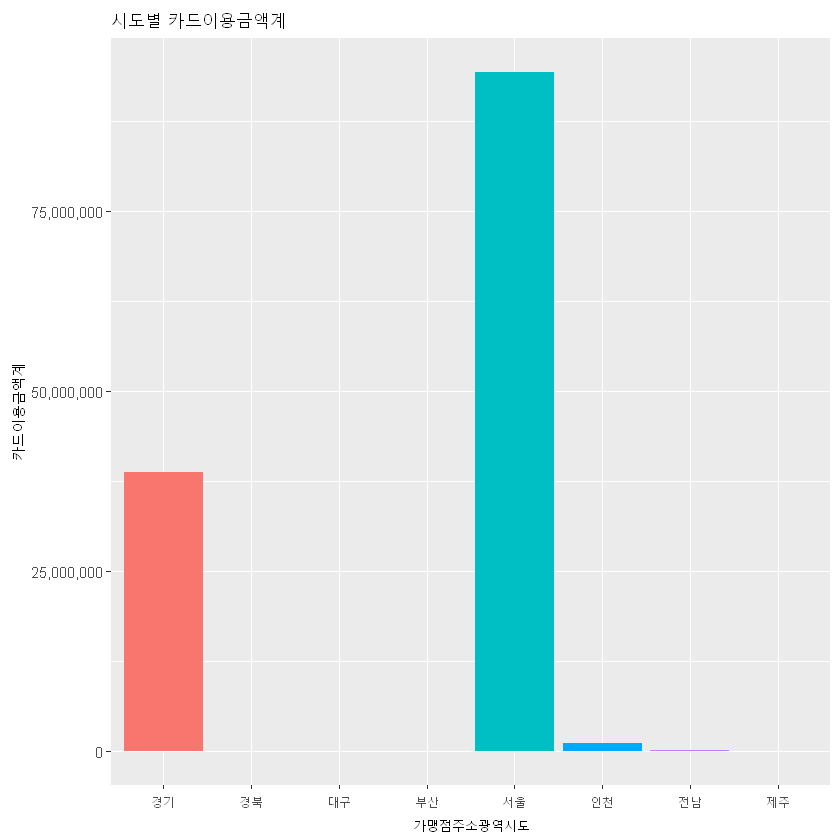

In [36]:
### 시도별 카드이용금액계
ggplot(data3_1, aes(가맹점주소광역시도,카드이용금액계, fill=가맹점주소광역시도)) +
  geom_col() +
  scale_y_continuous(labels = scales::comma) +
  ggtitle('시도별 카드이용금액계') +
  theme(legend.position='none')

=> 서울이 압도적으로 높다.

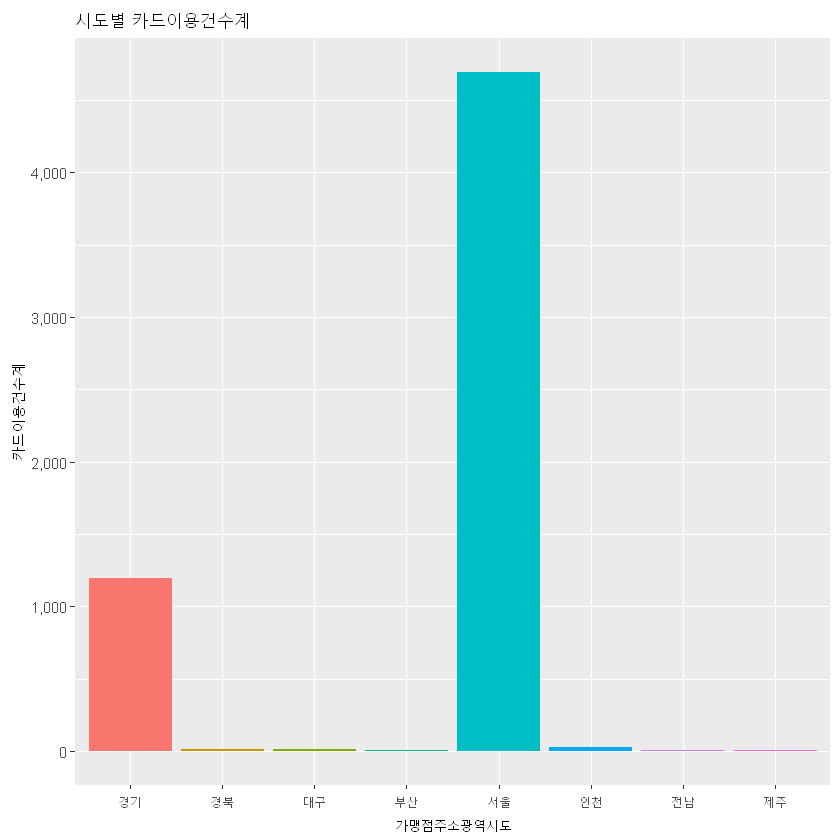

In [37]:
### 시도별 카드이용건수계
ggplot(data3_1, aes(가맹점주소광역시도,카드이용건수계, fill=가맹점주소광역시도)) +
  geom_col() +
  scale_y_continuous(labels = scales::comma) +
  ggtitle('시도별 카드이용건수계') +
  theme(legend.position='none')

=> 카드이용금액과 건수의 순서를 비교했을 때 서울>경기>인천 순으로 높다

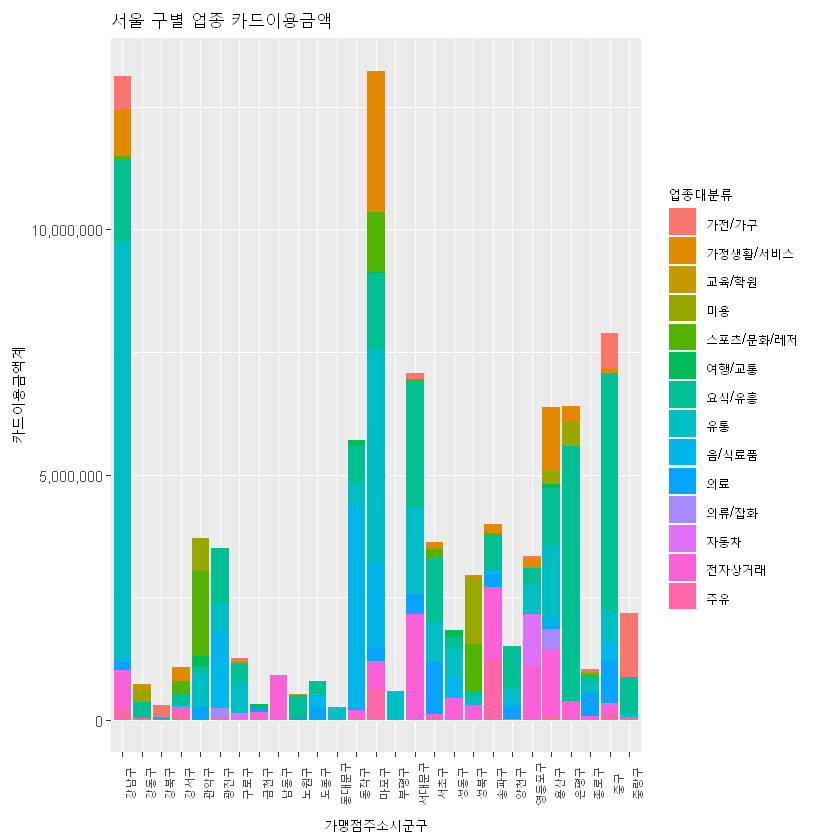

In [39]:
### 서울 가맹점구별 카드이용금액
seoul_sigungu <- data3_1 %>% filter(가맹점주소광역시도=='서울')

ggplot(seoul_sigungu, aes(가맹점주소시군구,카드이용금액계, fill=업종대분류)) +
  geom_bar(stat='identity') +
  theme(axis.text.x=element_text(angle=90)) +
  scale_y_continuous(labels = scales::comma) +
  ggtitle('서울 구별 업종 카드이용금액')

=> 강남구와 마포구의 이용 금액이 많으며, 특히 강남구는 유통이 대부분을 차지한다. 

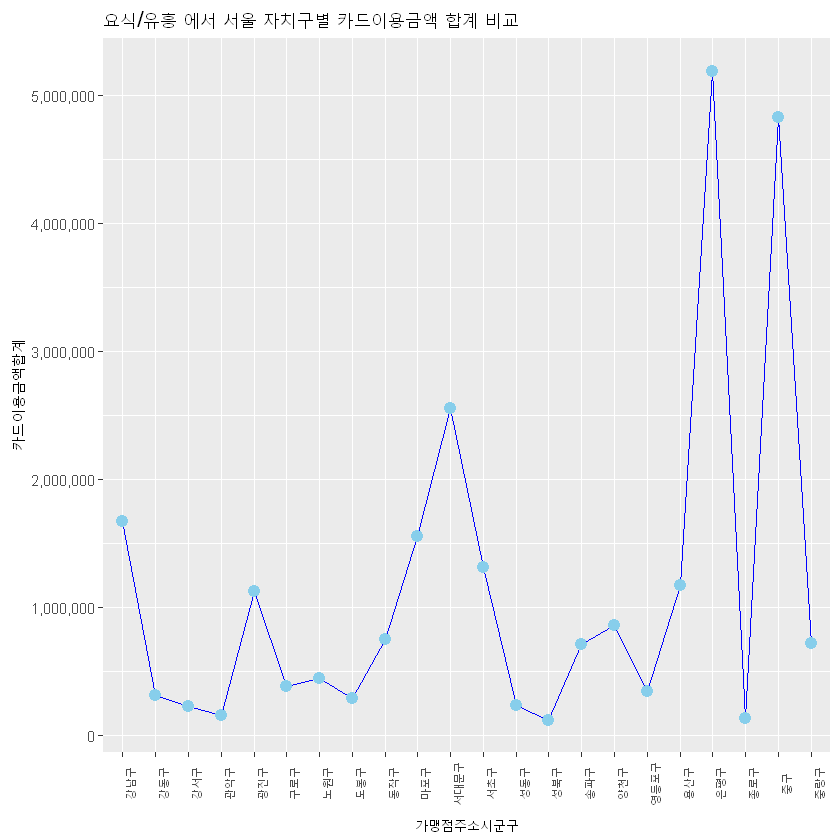

In [41]:
# 서울 요식/유흥업종
seoul_eat <- seoul_sigungu %>%
  filter(업종대분류=='요식/유흥') %>%
  group_by(가맹점주소시군구) %>% 
  summarise(카드이용금액합계=sum(카드이용금액계))

### 요식/유흥 에서 서울 자치구별 카드이용금액 합계 비교
ggplot(seoul_eat, aes(가맹점주소시군구, 카드이용금액합계, group=1)) +
  geom_line(color='blue') +
  geom_point(color='skyblue', size=3) +
  theme(axis.text.x=element_text(angle=90)) +
  theme(legend.position='bottom') + 
  scale_y_continuous(labels = scales::comma) +
  ggtitle('요식/유흥 에서 서울 자치구별 카드이용금액 합계 비교')
# => 은평구 > 중구> 서대문구 순으로 높다. 이곳에 식당이나 회사, 거주지가 많나보다.

=> 은평구 > 중구> 서대문구 순으로 높다. 이곳에 식당이나 회사, 거주지가 많나보다.

***
# data4_집계구별 일별시간대별 카드소비패턴
***
- 요일에 따른 업종별 카드이용금액
    - 일요일
    - 토요일
- 요일에 따른 의료업종 카드이용건수 비교

In [62]:
# 컬럼명 변경
names(data4) <- c('업종대분류','기준일자','시간대구간','고객주소집계구별','카드이용금액계','카드이용건수계')

In [63]:
# 기준년월을 날짜형식으로 변경, 요일 컬럼 생성
data4$기준일자 <- as.character(data4$기준일자)
data4$기준일자 <- as.Date(data4$기준일자, format='%Y%m%d')
str(data4)
data4$요일 <- weekdays(as.Date(data4$기준일자))

'data.frame':	500 obs. of  6 variables:
 $ 업종대분류      : Factor w/ 14 levels "가전/가구","가정생활/서비스",..: 7 8 8 5 10 5 10 14 9 5 ...
 $ 기준일자        : Date, format: "2016-10-04" "2021-03-03" ...
 $ 시간대구간      : int  6 5 6 5 6 3 3 3 6 2 ...
 $ 고객주소집계구별: num  1.12e+12 1.12e+12 1.12e+12 1.12e+12 1.11e+12 ...
 $ 카드이용금액계  : int  104624 382592 341688 925118 217985 592031 34959 5030 331980 19617 ...
 $ 카드이용건수계  : int  10 20 5 5 50 10 5 20 5 5 ...


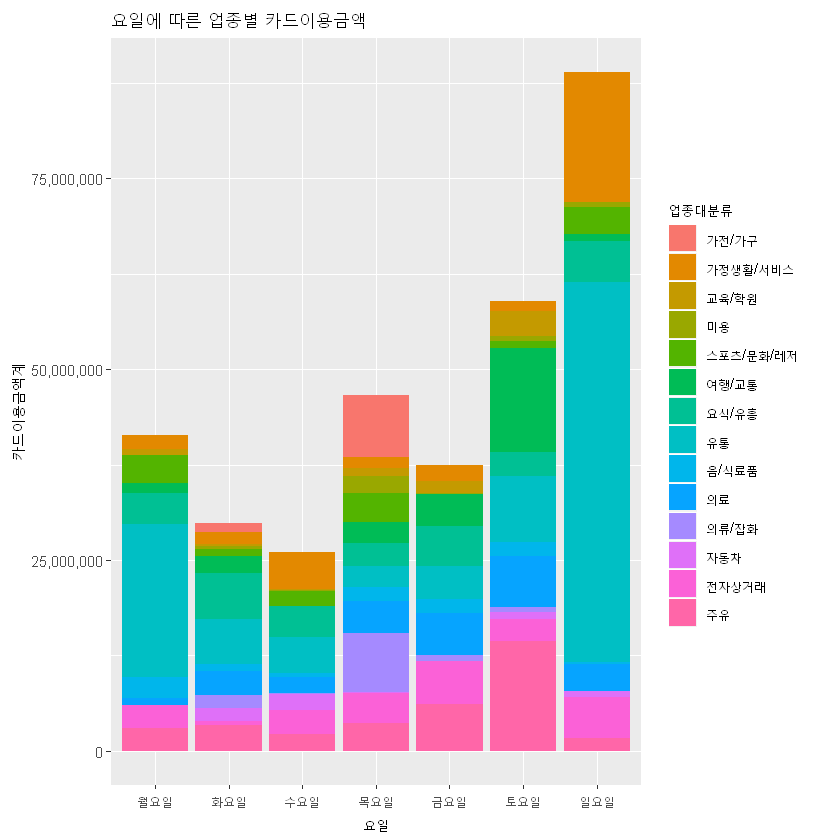

In [65]:
### 요일에 따른 업종별 카드이용금액
ggplot(data4, aes(요일, 카드이용금액계)) +
  geom_col(aes(fill=업종대분류)) +
  scale_x_discrete(limits=c('월요일','화요일','수요일','목요일','금요일','토요일','일요일')) +
  labs(title='요일에 따른 업종별 카드이용금액') +
  scale_y_continuous(labels = scales::comma)

=> 일요일이 카드이용금액이 가장 많다

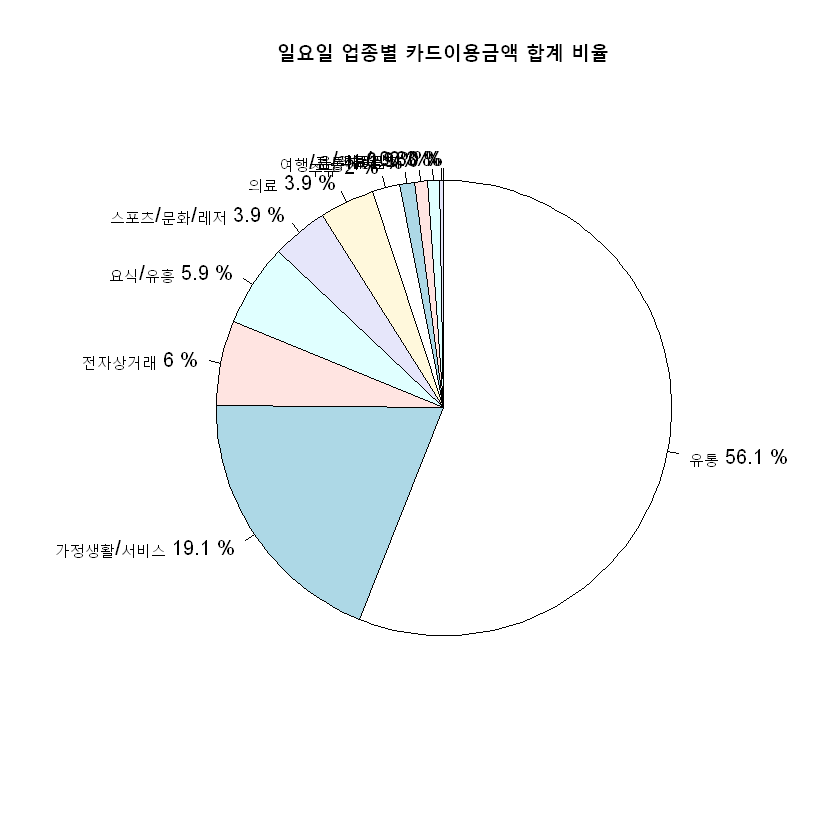

In [66]:
# 일요일에 어떤 업종이 제일 많은지 비교
sun <- data4 %>%
  filter(요일=='일요일') %>%
  select(업종대분류, 카드이용금액계) %>% 
  group_by(업종대분류) %>% 
  summarise(업종별카드이용금액합계 =sum(카드이용금액계))

sun_label <- sun %>% arrange(desc(업종별카드이용금액합계)) %>% 
  select(업종대분류)


sun_per <- round((sort(sun$업종별카드이용금액합계, decreasing = T)/sum(sort(sun$업종별카드이용금액합계, decreasing = T)))*100,1)

pie(sort(sun$업종별카드이용금액합계,decreasing = T),
    init.angle = 90,
    clockwise = T,
    labels = paste(sun_label$업종대분류, sun_per, '%'),
    main='일요일 업종별 카드이용금액 합계 비율')

=> 유통에서 반이상 차지한다. 주말에 쇼핑을 많이 하나보다

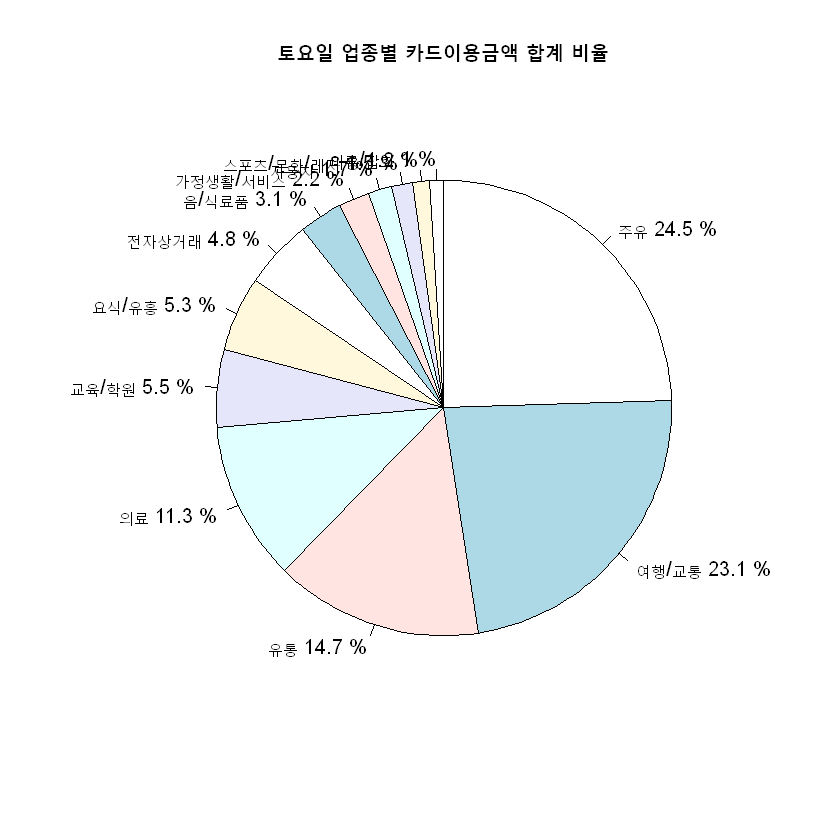

In [67]:
# 토요일에 어떤 업종이 제일 많은지 비교
sat <- data4 %>%
  filter(요일=='토요일') %>%
  select(업종대분류, 카드이용금액계) %>% 
  group_by(업종대분류) %>% 
  summarise(업종별카드이용금액합계 =sum(카드이용금액계))

sat_label <- sat %>% arrange(desc(업종별카드이용금액합계)) %>% 
  select(업종대분류)

sat_per <- round((sort(sat$업종별카드이용금액합계, decreasing = T)/sum(sort(sat$업종별카드이용금액합계, decreasing = T)))*100,1)

pie(sort(sat$업종별카드이용금액합계,decreasing = T),
    init.angle = 90,
    clockwise = T,
    labels = paste(sat_label$업종대분류, sat_per, '%'),
    main='토요일 업종별 카드이용금액 합계 비율')

 => 토요일은 주유와 여행/교통이 반 정도를 차지한다. 주말이라 놀러가나보다(부럽)

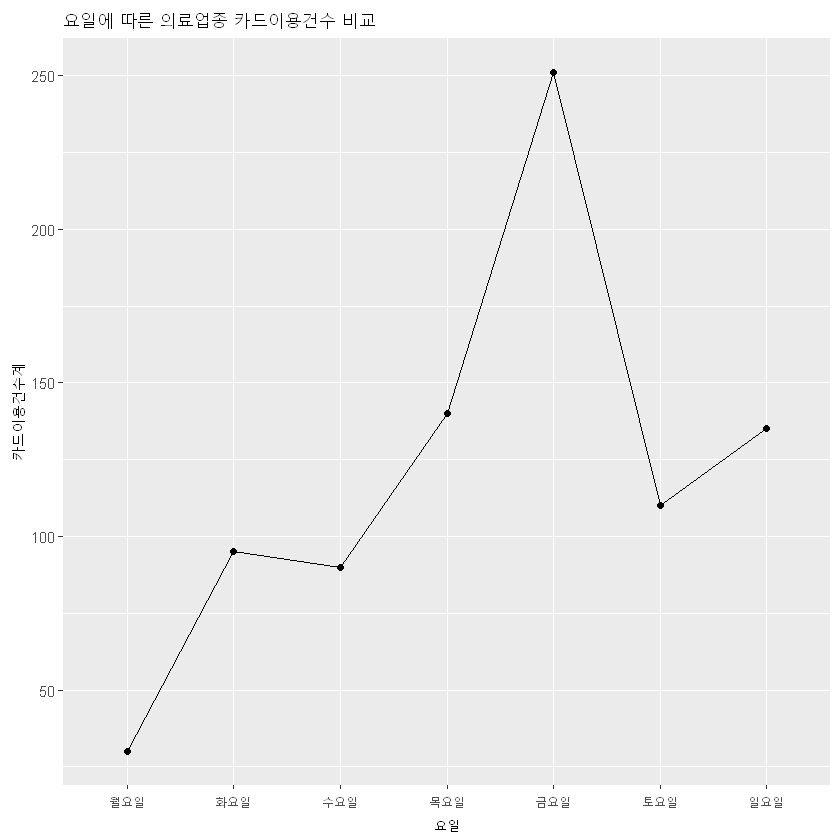

In [68]:
# 요일에 따른 의료업종 카드이용건수 비교
hospital <- data4 %>%
  filter(업종대분류=='의료') %>% 
  group_by(요일) %>% 
  summarise(카드이용건수계=sum(카드이용건수계))

ggplot(hospital, aes(요일, 카드이용건수계, group=1)) +
  geom_line() +
  geom_point() +
  scale_x_discrete(limits=c('월요일','화요일','수요일','목요일','금요일','토요일','일요일')) +
  ggtitle('요일에 따른 의료업종 카드이용건수 비교')

=> 금요일이 제일 많은 것을 보니 반차내고 병원가나보다.. 월요일은 출근해야하니까..

***

In [71]:
!pip install dacon_submit_api-0.0.4-py3-none-any.whl

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: 예상하지 못한 기호(symbol)입니다.
1: !pip install
         ^
